# Stage 3
# Denis Savytski 

## Imports

In [22]:
from tmp import train, test, CNN
import torch
from matplotlib import pyplot as plt
from custom_datasets import MNISTDataSet, CIFARDataSet, ORLDataSet
from models import CNN_MNIST, CNN_CIFAR, CNN_ORL
from torch.utils.data import DataLoader
from torch import nn
import numpy as np

### Run function

In [23]:

def run(model, loss_fn, lr=0.001, bst=64, bstest=64, epochs=10, model_setup=0, disable_msg=False):
    if model == "MNIST":
        train_data = MNISTDataSet(train=True)
        test_data = MNISTDataSet(train=False)
        m = CNN_MNIST()
    elif model == "CIFAR":
        train_data = CIFARDataSet(train=True)
        test_data = CIFARDataSet(train=False)
        m = CNN_CIFAR()
    elif model == "ORL":
        train_data = ORLDataSet(train=True)
        test_data = ORLDataSet(train=False)
        m = CNN_ORL(model_setup)
    else:
        print(f"Error, model {model} is unidentified \n")
        return 
    
    if bst == "full":
        bst = len(train_data)
    if bstest == "full":
        bstest = len(train_data)
       
    test_loader = DataLoader(test_data, batch_size=bst, shuffle=True)
    train_loader = DataLoader(train_data, batch_size=bstest, shuffle=True)
    m.to("cpu")
    
    
    opt = torch.optim.Adam(m.parameters(), lr=lr)
    train_loss = []

    for i in range(epochs):
        if disable_msg == False:
            print(f"Epoch {i+1} ----------")
        train_loss.append(train(train_loader, m, opt, loss_fn))
        if disable_msg == False:
            print(f"Training loss: {train_loss[i]}")
    
    test(test_loader, m, loss_fn)
    test(train_loader, m, loss_fn, "Train")
    plt.plot(train_loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss (cross entropy)")
    plt.title(f"Loss convergence plot for {model}")
    plt.show()    

### Default Models

`MNIST`


Epoch 1 ----------
Training loss: 0.9867429516510542
Epoch 2 ----------
Training loss: 0.1833970850663208
Epoch 3 ----------
Training loss: 0.12510157701994246
Epoch 4 ----------
Training loss: 0.10494100761268216
Epoch 5 ----------
Training loss: 0.09091422634759247
Epoch 6 ----------
Training loss: 0.08069548498330785
Epoch 7 ----------
Training loss: 0.07455451666429115
Epoch 8 ----------
Training loss: 0.06861333190542913
Epoch 9 ----------
Training loss: 0.06426000459018404
Epoch 10 ----------
Training loss: 0.06229236184173564

        Metrics for MNIST on Test data:
        -- Accuracy: 98.15 % 
        -- Recall: 98.15 %
        -- Precision: 98.16 % 
        -- F1: 98.16 %
        -- Loss: 0.06 
        

        Metrics for MNIST on Train data:
        -- Accuracy: 98.48 % 
        -- Recall: 98.46 %
        -- Precision: 98.49 % 
        -- F1: 98.48 %
        -- Loss: 0.05 
        


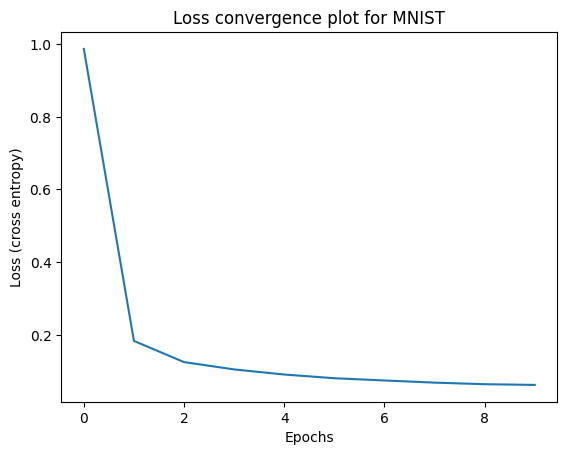

In [3]:

run("MNIST", nn.CrossEntropyLoss())

`CIFAR`  
This model's training loss converges rather slowly. Setting learning rate higher makes model diverge. Moreover, training loss does not seem to affect test accuracy and test loss.
Test accuracy remains around 47% for almost any model that i've tried on `CIFAR`



        Metrics for CIFAR on Test data:
        -- Accuracy: 40.31 % 
        -- Recall: 40.13 %
        -- Precision: 39.88 % 
        -- F1: 40.01 %
        -- Loss: 6.67 
        

        Metrics for CIFAR on Train data:
        -- Accuracy: 92.17 % 
        -- Recall: 92.17 %
        -- Precision: 92.32 % 
        -- F1: 92.24 %
        -- Loss: 0.22 
        


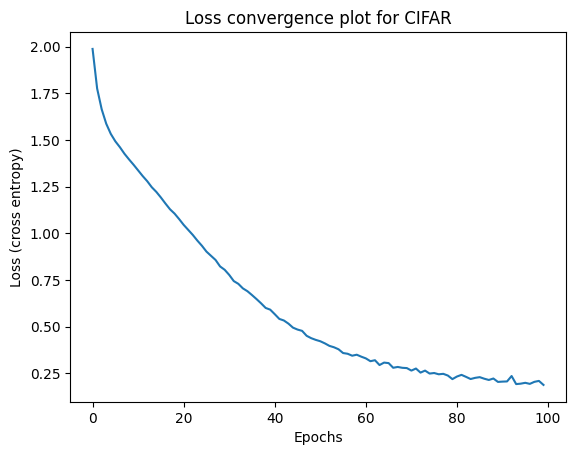

In [4]:
run("CIFAR", nn.CrossEntropyLoss(), epochs=100, disable_msg=True)

`ORL`

Epoch 1 ----------
Training loss: 6.663857460021973
Epoch 2 ----------
Training loss: 3.7217792669932046
Epoch 3 ----------
Training loss: 3.6743536790211997
Epoch 4 ----------
Training loss: 3.600448568662008
Epoch 5 ----------
Training loss: 3.4112888177235923
Epoch 6 ----------
Training loss: 3.036167621612549
Epoch 7 ----------
Training loss: 2.5056621630986533
Epoch 8 ----------
Training loss: 1.9029366771380107
Epoch 9 ----------
Training loss: 1.4981874227523804
Epoch 10 ----------
Training loss: 1.038084348042806
Epoch 11 ----------
Training loss: 0.8092929224173228
Epoch 12 ----------
Training loss: 0.6095888316631317
Epoch 13 ----------
Training loss: 0.5606276243925095
Epoch 14 ----------
Training loss: 0.47645003100236255
Epoch 15 ----------
Training loss: 0.2971759190162023
Epoch 16 ----------
Training loss: 0.27280289431413013
Epoch 17 ----------
Training loss: 0.23148395121097565
Epoch 18 ----------
Training loss: 0.19328613951802254
Epoch 19 ----------
Training loss: 0.

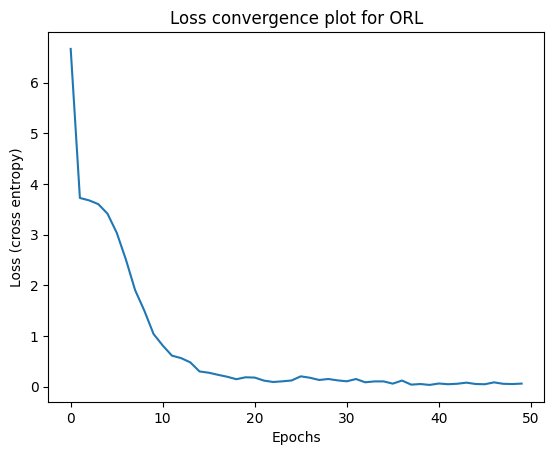

In [5]:
run("ORL", nn.CrossEntropyLoss(), epochs=50)

## Ablation Studies
#### ORL

1) Try `full batch`


        Metrics for ORL on Test data:
        -- Accuracy: 90.00 % 
        -- Recall: 70.00 %
        -- Precision: 95.83 % 
        -- F1: 80.90 %
        -- Loss: 0.25 
        

        Metrics for ORL on Train data:
        -- Accuracy: 100.00 % 
        -- Recall: 100.00 %
        -- Precision: 100.00 % 
        -- F1: 100.00 %
        -- Loss: 0.00 
        


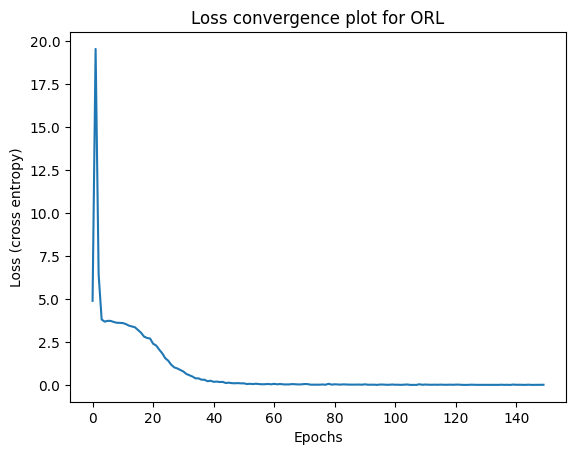

In [6]:
run("ORL", nn.CrossEntropyLoss(), bst="full", bstest="full", epochs=150, disable_msg=True)

Full batch increased recall and f1 scores for the model.  
2) Change activation function, from `ReLU` to `Sigmoid`

Epoch 1 ----------
Training loss: 3.761201024055481
Epoch 2 ----------
Training loss: 3.7122991482416787
Epoch 3 ----------
Training loss: 3.6964260737101235
Epoch 4 ----------
Training loss: 3.695738196372986
Epoch 5 ----------
Training loss: 3.6951172749201455
Epoch 6 ----------
Training loss: 3.7023969888687134
Epoch 7 ----------
Training loss: 3.697717030843099
Epoch 8 ----------
Training loss: 3.6948529879252114
Epoch 9 ----------
Training loss: 3.6933039824167886
Epoch 10 ----------
Training loss: 3.6930657625198364
Epoch 11 ----------
Training loss: 3.6961880127588906
Epoch 12 ----------
Training loss: 3.695246616999308
Epoch 13 ----------
Training loss: 3.69487996896108
Epoch 14 ----------
Training loss: 3.699320356051127
Epoch 15 ----------
Training loss: 3.6984059810638428
Epoch 16 ----------
Training loss: 3.6973883708318076
Epoch 17 ----------
Training loss: 3.6953285932540894
Epoch 18 ----------
Training loss: 3.7036499977111816
Epoch 19 ----------
Training loss: 3.6945339

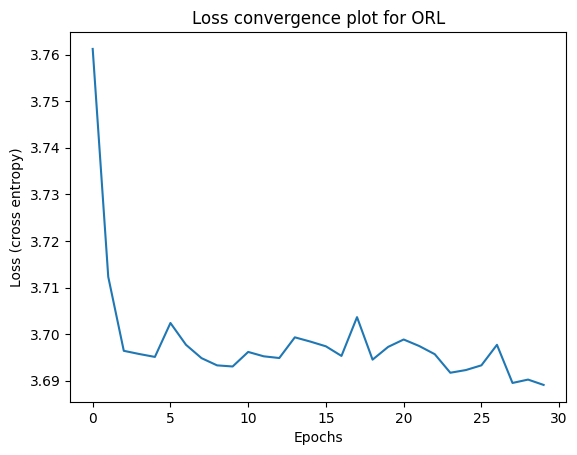

In [7]:
run("ORL", nn.CrossEntropyLoss(), epochs=30, model_setup=1)

Changing activation function completely destroyed the model. Accuracy of 2.5% is equivalent to just guessing.
Therefore we will further stic to using `ReLU` as activation function  
3) Change `MaxPool` layers to `AvgPool` layers. 

Epoch 1 ----------
Training loss: 5.919908761978149
Epoch 2 ----------
Training loss: 3.7339945634206138
Epoch 3 ----------
Training loss: 3.68694269657135
Epoch 4 ----------
Training loss: 3.6232037941614785
Epoch 5 ----------
Training loss: 3.4965206384658813
Epoch 6 ----------
Training loss: 3.198892911275228
Epoch 7 ----------
Training loss: 2.6088360945383706
Epoch 8 ----------
Training loss: 2.0411620338757834
Epoch 9 ----------
Training loss: 1.6251426736513774
Epoch 10 ----------
Training loss: 1.2814682722091675
Epoch 11 ----------
Training loss: 0.9851701557636261
Epoch 12 ----------
Training loss: 0.6451198955376943
Epoch 13 ----------
Training loss: 0.5037689581513405
Epoch 14 ----------
Training loss: 0.4321081340312958
Epoch 15 ----------
Training loss: 0.3884590069452922
Epoch 16 ----------
Training loss: 0.3033305803934733
Epoch 17 ----------
Training loss: 0.25096409519513446
Epoch 18 ----------
Training loss: 0.20750023672978082
Epoch 19 ----------
Training loss: 0.17

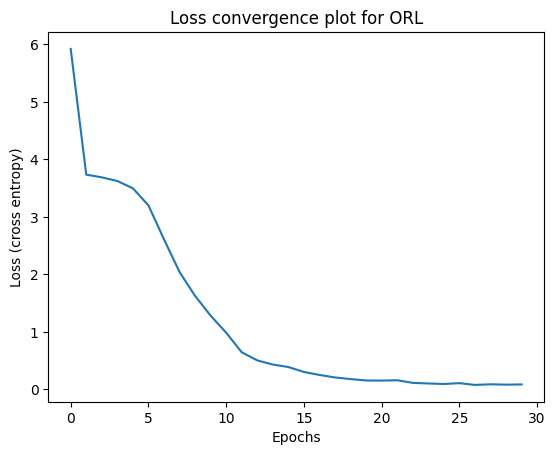

In [8]:
run("ORL", nn.CrossEntropyLoss(), epochs=30, model_setup=2)

This model shows slightly better performance then the default model, therefore we will stick to `MaxPool`  
4) Play around with `kernel size`. Setting this parameter to 5 instead of 3:

Epoch 1 ----------
Training loss: 5.410857876141866
Epoch 2 ----------
Training loss: 3.737848917643229
Epoch 3 ----------
Training loss: 3.7000120480855307
Epoch 4 ----------
Training loss: 3.6885852813720703
Epoch 5 ----------
Training loss: 3.7044533491134644
Epoch 6 ----------
Training loss: 3.697980801264445
Epoch 7 ----------
Training loss: 3.6771881580352783
Epoch 8 ----------
Training loss: 3.670632481575012
Epoch 9 ----------
Training loss: 3.633671005566915
Epoch 10 ----------
Training loss: 3.589721163113912
Epoch 11 ----------
Training loss: 3.4448407888412476
Epoch 12 ----------
Training loss: 3.220162312189738
Epoch 13 ----------
Training loss: 2.9838689963022866
Epoch 14 ----------
Training loss: 2.799012462298075
Epoch 15 ----------
Training loss: 2.5999149481455484
Epoch 16 ----------
Training loss: 2.362264315287272
Epoch 17 ----------
Training loss: 2.0592641035715737
Epoch 18 ----------
Training loss: 1.9514206846555073
Epoch 19 ----------
Training loss: 1.757499833

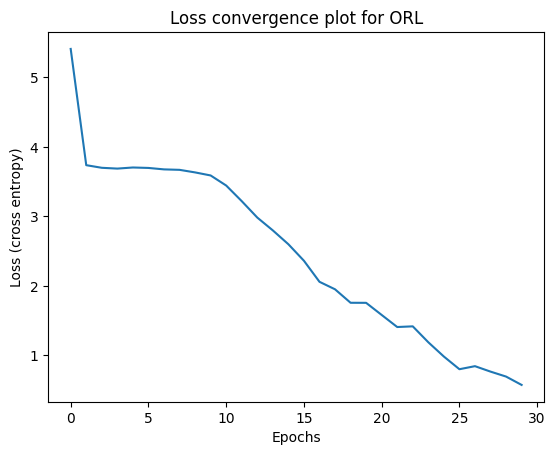

In [20]:
run("ORL", nn.CrossEntropyLoss(), epochs=30, model_setup=3)

Increasing size of kernels seems to significantly decrease accuracy, to 85%
5) After playing more around kernels sizes and adding padding, I managed to dervie a better model.
Default model with `kernel size` increased to 5, and added padding of 2, we get:

Epoch 1 ----------
Training loss: 6.436025182406108
Epoch 2 ----------
Training loss: 3.684855103492737
Epoch 3 ----------
Training loss: 3.6410226821899414
Epoch 4 ----------
Training loss: 3.56855316956838
Epoch 5 ----------
Training loss: 3.3257954518000283
Epoch 6 ----------
Training loss: 3.1395297050476074
Epoch 7 ----------
Training loss: 2.7452534437179565
Epoch 8 ----------
Training loss: 2.4517497618993125
Epoch 9 ----------
Training loss: 2.1480407118797302
Epoch 10 ----------
Training loss: 1.8486411571502686
Epoch 11 ----------
Training loss: 1.636442760626475
Epoch 12 ----------
Training loss: 1.3697993954022725
Epoch 13 ----------
Training loss: 1.36667666832606
Epoch 14 ----------
Training loss: 1.1608957250912983
Epoch 15 ----------
Training loss: 1.1202345887819927
Epoch 16 ----------
Training loss: 0.903280774752299
Epoch 17 ----------
Training loss: 0.9906216661135355
Epoch 18 ----------
Training loss: 0.6683104485273361
Epoch 19 ----------
Training loss: 0.77294130

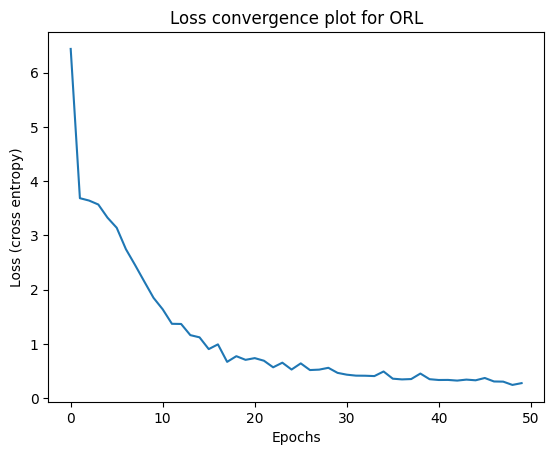

In [10]:
run("ORL", nn.CrossEntropyLoss(), epochs=50, model_setup=4)

#### CIFAR

1) One problem of this model is its slow convergence at a `lr` of 0.001, however setting it higher makes the model diverge:

Epoch 1 ----------
Training loss: 2.3029493492887454
Epoch 2 ----------
Training loss: 2.3036322523565853
Epoch 3 ----------
Training loss: 2.303629580666037
Epoch 4 ----------
Training loss: 2.303486476164035
Epoch 5 ----------
Training loss: 2.303464314821736
Epoch 6 ----------
Training loss: 2.303533650725089
Epoch 7 ----------
Training loss: 2.30376340909992
Epoch 8 ----------
Training loss: 2.3035846189464753
Epoch 9 ----------
Training loss: 2.3036366341364047
Epoch 10 ----------
Training loss: 2.3035869644121134
Epoch 11 ----------
Training loss: 2.303643392784821
Epoch 12 ----------
Training loss: 2.3034479855881322
Epoch 13 ----------
Training loss: 2.303634654530479
Epoch 14 ----------
Training loss: 2.3037604191114225
Epoch 15 ----------
Training loss: 2.303652942942841
Epoch 16 ----------
Training loss: 2.303632808158465
Epoch 17 ----------
Training loss: 2.303674406407739
Epoch 18 ----------
Training loss: 2.3036131038690164
Epoch 19 ----------
Training loss: 2.30360783061

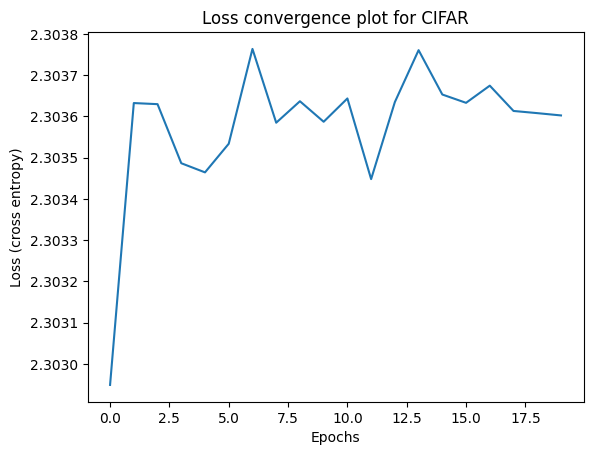

In [17]:
run("CIFAR", nn.CrossEntropyLoss(), epochs=20, lr=0.01)

I've also tried changing batch size, but it does not seem to have any significant effect on the model. Therefore we will stick to `lr` of 0.001 and `batch_size` of 64   
2) Add `padding` of size 2 to the model

Epoch 1 ----------
Training loss: 1.9600004425743962
Epoch 2 ----------
Training loss: 1.768551742329317
Epoch 3 ----------
Training loss: 1.690834826063317
Epoch 4 ----------
Training loss: 1.6272938885652195
Epoch 5 ----------
Training loss: 1.574433651116803
Epoch 6 ----------
Training loss: 1.5364400207843927
Epoch 7 ----------
Training loss: 1.5041727312385578
Epoch 8 ----------
Training loss: 1.4754965090385788
Epoch 9 ----------
Training loss: 1.4473437844487407
Epoch 10 ----------
Training loss: 1.4223553261641042
Epoch 11 ----------
Training loss: 1.404143565679755
Epoch 12 ----------
Training loss: 1.3778499727663787
Epoch 13 ----------
Training loss: 1.354676023849746
Epoch 14 ----------
Training loss: 1.3297909147599165
Epoch 15 ----------
Training loss: 1.313886020189661
Epoch 16 ----------
Training loss: 1.2888677720066226
Epoch 17 ----------
Training loss: 1.2651613922527685
Epoch 18 ----------
Training loss: 1.2440423807677101
Epoch 19 ----------
Training loss: 1.223363

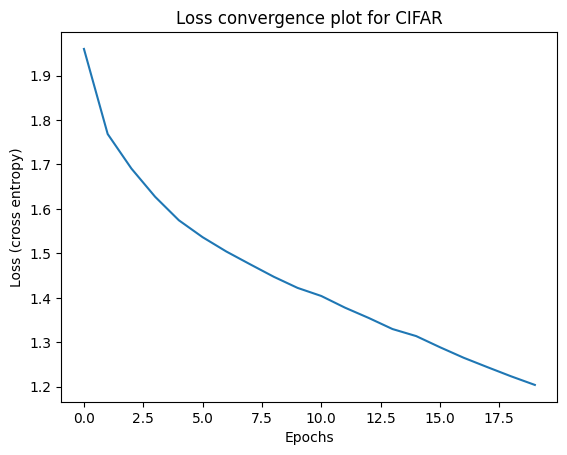

In [18]:
run("CIFAR", nn.CrossEntropyLoss(), epochs=20, model_setup=1)

Adding padding seems to enhance the model. We will also try to change model by adding one more Convolution Layer.   
3) Change number of channels to 3->33->66->132, and kernels of convolution layers to 3, along with padding of 2



3) Model tri

Epoch 1 ----------
Training loss: 1.9811468488724946
Epoch 2 ----------
Training loss: 1.7567585339326688
Epoch 3 ----------
Training loss: 1.6530263542824084
Epoch 4 ----------
Training loss: 1.6043654928731796
Epoch 5 ----------
Training loss: 1.5632719159736048
Epoch 6 ----------
Training loss: 1.5302781915420767
Epoch 7 ----------
Training loss: 1.5046630315768443
Epoch 8 ----------
Training loss: 1.4798367994520671
Epoch 9 ----------
Training loss: 1.4473240020329996
Epoch 10 ----------
Training loss: 1.42290364278247
Epoch 11 ----------
Training loss: 1.4009190912136946
Epoch 12 ----------
Training loss: 1.3718100130710456
Epoch 13 ----------
Training loss: 1.3450680391867753
Epoch 14 ----------
Training loss: 1.3194964342105113
Epoch 15 ----------
Training loss: 1.2907364552130784
Epoch 16 ----------
Training loss: 1.2625566437421247
Epoch 17 ----------
Training loss: 1.2342523852425158
Epoch 18 ----------
Training loss: 1.2090340158366182
Epoch 19 ----------
Training loss: 1.18

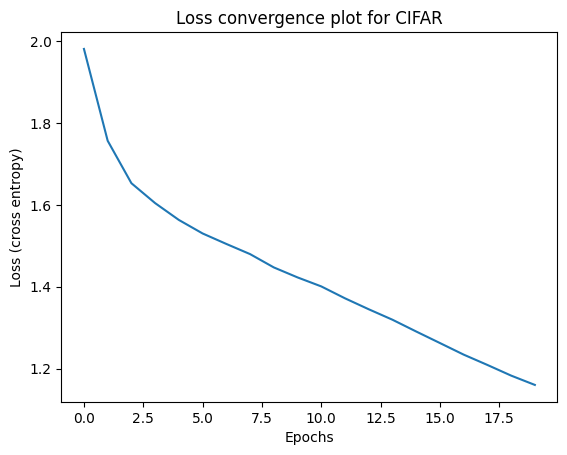

In [24]:
run("CIFAR", nn.CrossEntropyLoss(), epochs=20, model_setup=2)

No significant difference is seen compared to the previous model.  
4) Change `Maxpool` to `AvgPool`

Epoch 1 ----------
Training loss: 1.9735926659515752
Epoch 2 ----------
Training loss: 1.75566088680721
Epoch 3 ----------
Training loss: 1.6577096099743758
Epoch 4 ----------
Training loss: 1.5971515122277047
Epoch 5 ----------
Training loss: 1.5583207088968027
Epoch 6 ----------
Training loss: 1.5221467948020877
Epoch 7 ----------
Training loss: 1.4916600408151632
Epoch 8 ----------
Training loss: 1.4589182833576446
Epoch 9 ----------
Training loss: 1.4346909492521944
Epoch 10 ----------
Training loss: 1.4066830981722878
Epoch 11 ----------
Training loss: 1.3817367451575102
Epoch 12 ----------
Training loss: 1.3592117485182975
Epoch 13 ----------
Training loss: 1.3320961840012495
Epoch 14 ----------
Training loss: 1.3035919747084304
Epoch 15 ----------
Training loss: 1.2777131216605302
Epoch 16 ----------
Training loss: 1.2542967878644118
Epoch 17 ----------
Training loss: 1.2283910166119676
Epoch 18 ----------
Training loss: 1.1955570910135498
Epoch 19 ----------
Training loss: 1.17

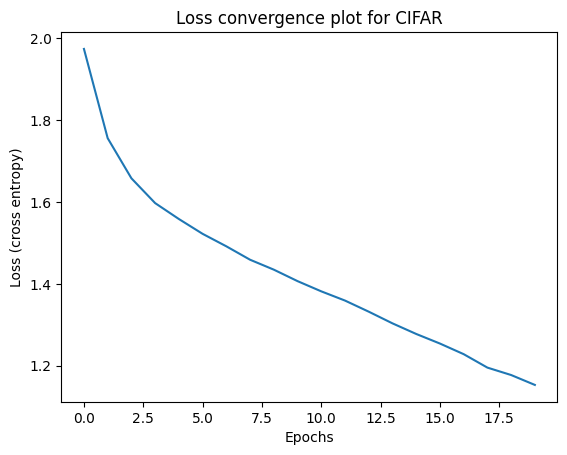

In [25]:
run("CIFAR", nn.CrossEntropyLoss(), epochs=20, model_setup=3)

5) From the graph one might think that there is not enough number of epochs for the model to converge. However, this is not the case.
While providing more epochs does indeed make loss function converge, it makes the model biased to the training set, and negatively impacts the test set:

In [26]:
run("CIFAR", nn.CrossEntropyLoss(), epochs=100, model_setup=3)

Epoch 1 ----------
Training loss: 2.0300569252284895
Epoch 2 ----------
Training loss: 1.813474360329416
Epoch 3 ----------
Training loss: 1.7362758232199627
Epoch 4 ----------
Training loss: 1.683852438274247
Epoch 5 ----------
Training loss: 1.6379285491336033
Epoch 6 ----------
Training loss: 1.6042028442977945
Epoch 7 ----------
Training loss: 1.563962116113404
Epoch 8 ----------
Training loss: 1.5386105688941447
Epoch 9 ----------
Training loss: 1.5067604231407574
Epoch 10 ----------
Training loss: 1.4819762087843913
Epoch 11 ----------
Training loss: 1.4559139167256367
Epoch 12 ----------
Training loss: 1.4328767017025472
Epoch 13 ----------
Training loss: 1.4086384517152597
Epoch 14 ----------
Training loss: 1.3806222738207454
Epoch 15 ----------
Training loss: 1.365338306064191
Epoch 16 ----------
Training loss: 1.3440313291214312
Epoch 17 ----------
Training loss: 1.3224746978953672
Epoch 18 ----------
Training loss: 1.3018980852478301
Epoch 19 ----------
Training loss: 1.2807